In [7]:
import networkx as nx
import time

In [8]:
file = open("armstrong.c.012t.cfg", "r+")
lines = file.readlines()
block_list = []

for i in range(0,len(lines)):
    if('bb'in lines[i]):
        if not ('goto' in lines[i]):
            block = {}
            number = int(lines[i][6])
            for k in range (7,len(lines[i])):
                    
                    if(lines[i][k]!='>'): 
                        number = number*10 + int(lines[i][k])
                    else:
                         break;
            block['number'] = number
            block['content'] = []

            for j in range (i,len(lines)):
                if(lines[j]=='\n'):
                    break
                block['content'].append(lines[j+1])
            block_list.append(block)

for block in block_list:
    block['edge'] = []
    flag = 0
    for item in block["content"]:
        if('goto' in item):
              flag = 1;
              no = item.rfind('>')
              block['edge'].append(int(item[no-1]))
    if(flag==0):
         block['edge'].append(int(block['number']) + 1)

for block in block_list:
     block['content'].pop();

for block in block_list:
     block['wcet'] = int(len(block['content'])*10);
     print(block['wcet'])

number_line = [32,38,45,51,57,61,64,67]

for i in range(0,len(block_list)):
     block_list[i]['start'] = number_line[i];

for block in block_list:
     print(block['number'],block['content'],block['edge'],block['start'])





  

40
50
40
40
20
10
10
20
2 ['  num = 371;\n', '  result = 0;\n', '  originalNum = num;\n', '  goto <bb 4>; [INV]\n'] [4] 32
3 ['  remainder = originalNum % 10;\n', '  _1 = remainder * remainder;\n', '  _2 = remainder * _1;\n', '  result = result + _2;\n', '  originalNum = originalNum / 10;\n'] [4] 38
4 ['  if (originalNum != 0)\n', '    goto <bb 3>; [INV]\n', '  else\n', '    goto <bb 5>; [INV]\n'] [3, 5] 45
5 ['  if (result == num)\n', '    goto <bb 6>; [INV]\n', '  else\n', '    goto <bb 7>; [INV]\n'] [6, 7] 51
6 ['  printf ("%d is an Armstrong number.", num);\n', '  goto <bb 8>; [INV]\n'] [8] 57
7 ['  printf ("%d is not an Armstrong number.", num);\n'] [8] 61
8 ['  D.2020 = 0;\n'] [9] 64
9 ['<L6>:\n', '  return D.2020;\n'] [10] 67


[(2, 4), (3, 4), (4, 3), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


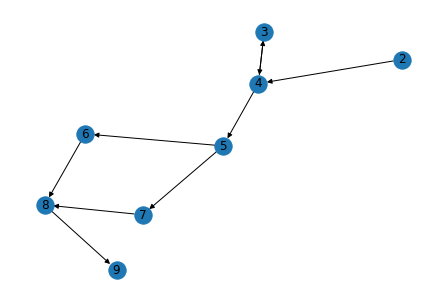

In [9]:
edge = []
# list of edges
for block in block_list:
    if(len(block['edge'])==1):
        edge.append(tuple((block['number'],block['edge'][0])))
    else:
        for item in block['edge']:
            edge.append(tuple((block['number'],int(item))))

edge.pop()
 
print(edge)
graph = nx.DiGraph()

graph.add_edges_from(edge)

nx.draw(graph, with_labels=True)

In [10]:
threshold = 50
i = 0
j = 0
it = 0
rg = 1
length = len(block_list[i]['content'])
while(threshold!=0 and it<5):
    while(j < length):
        # print("inside for loop")
        if('goto' in block_list[i]['content'][j]):
            threshold-=10
            print(f"{block_list[i]['content'][j]} threshold:{threshold}")
            print()
            temp_i = i;
            temp_j = j;
            no = block_list[i]['content'][j].rfind('>')
            i = int(block_list[i]['content'][j][no-1]) - 2
            length = len(block_list[i]['content'])
            j = -1
            if(threshold==0):
                print(f"Region***********************: {rg}")
                rg+=1
                j += 1
                break
        elif(j != len((block_list[i]['content']))-1):
            threshold-=10
            print(f"{block_list[i]['content'][j]} threshold:{threshold}")
            print()
            temp_i = i;
            temp_j = j;
            
            if(threshold==0):
                print(f"Region***********************: {rg}")
                rg+=1
                j+=1
                break;
        else:
            # print(block_list[i]['content'][j])
            threshold-=10
            print(f"{block_list[i]['content'][j]} threshold:{threshold}")
            print()
            temp_i = i;
            temp_j = j;
            i = i+1
            j = -1
            length = len(block_list[i]['content'])
            if(threshold==0):
                 print(f"Region***********************: {rg}")
                 
                 rg+=1
                 j += 1
                 break;
        j+=1
    
    # print(f"outside for loop and threshold is {threshold}")
    print()
    time.sleep(2);
    threshold = 50;
    it+=1

  num = 371;
 threshold:40

  result = 0;
 threshold:30

  originalNum = num;
 threshold:20

  goto <bb 4>; [INV]
 threshold:10

  if (originalNum != 0)
 threshold:0

Region***********************: 1

    goto <bb 3>; [INV]
 threshold:40

  remainder = originalNum % 10;
 threshold:30

  _1 = remainder * remainder;
 threshold:20

  _2 = remainder * _1;
 threshold:10

  result = result + _2;
 threshold:0

Region***********************: 2

  originalNum = originalNum / 10;
 threshold:40

  if (originalNum != 0)
 threshold:30

    goto <bb 3>; [INV]
 threshold:20

  remainder = originalNum % 10;
 threshold:10

  _1 = remainder * remainder;
 threshold:0

Region***********************: 3

  _2 = remainder * _1;
 threshold:40

  result = result + _2;
 threshold:30

  originalNum = originalNum / 10;
 threshold:20

  if (originalNum != 0)
 threshold:10

    goto <bb 3>; [INV]
 threshold:0

Region***********************: 4

  remainder = originalNum % 10;
 threshold:40

  _1 = remainder * remain